### Importation des librairies

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Chargement des données

In [7]:
df = pd.read_csv("StudentsPerformance.csv")

### Analyse exploratoire (EDA)

In [8]:
import numpy as np

# Patch pour NumPy 2.x (VisibleDeprecationWarning supprimé)
if not hasattr(np, "VisibleDeprecationWarning"):
    class VisibleDeprecationWarning(UserWarning):
        pass
    np.VisibleDeprecationWarning = VisibleDeprecationWarning

import sweetviz as sv

report = sv.analyze(df)
report.show_html("eda_sweetviz.html", open_browser=True)
print("Rapport généré : eda_sweetviz.html")


                                             |          | [  0%]   00:00 -> (? left)

Report eda_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Rapport généré : eda_sweetviz.html


In [9]:
# Afficher les premières lignes de DataFrame
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
# Affichage des informations générales de dataset
df.info()
# Affichage de nombre des observations et nombre des variables
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


(1000, 8)

In [11]:
# Statistiques descriptives des variables numériques
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
# Vérification des valeurs manquantes
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
# Analyse des variables catégorielles
df.select_dtypes(include='object').columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [14]:
# Affichage des modalités par variable
for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].unique())
    print("********")

gender
['female' 'male']
********
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
********
parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
********
lunch
['standard' 'free/reduced']
********
test preparation course
['none' 'completed']
********


In [15]:
# Nombre de modalités par variable
df.select_dtypes(include='object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [16]:
# Sélectionnement des étudiants qui ont plus de 80 dans les 3 matières
df[df[["math score","reading score","writing score"]].min(axis=1) > 80]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82
49,male,group C,high school,standard,completed,82,84,82
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
962,female,group E,associate's degree,standard,none,100,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100
979,female,group C,associate's degree,standard,none,91,95,94


#### *Analyse univariée/multivariée* 

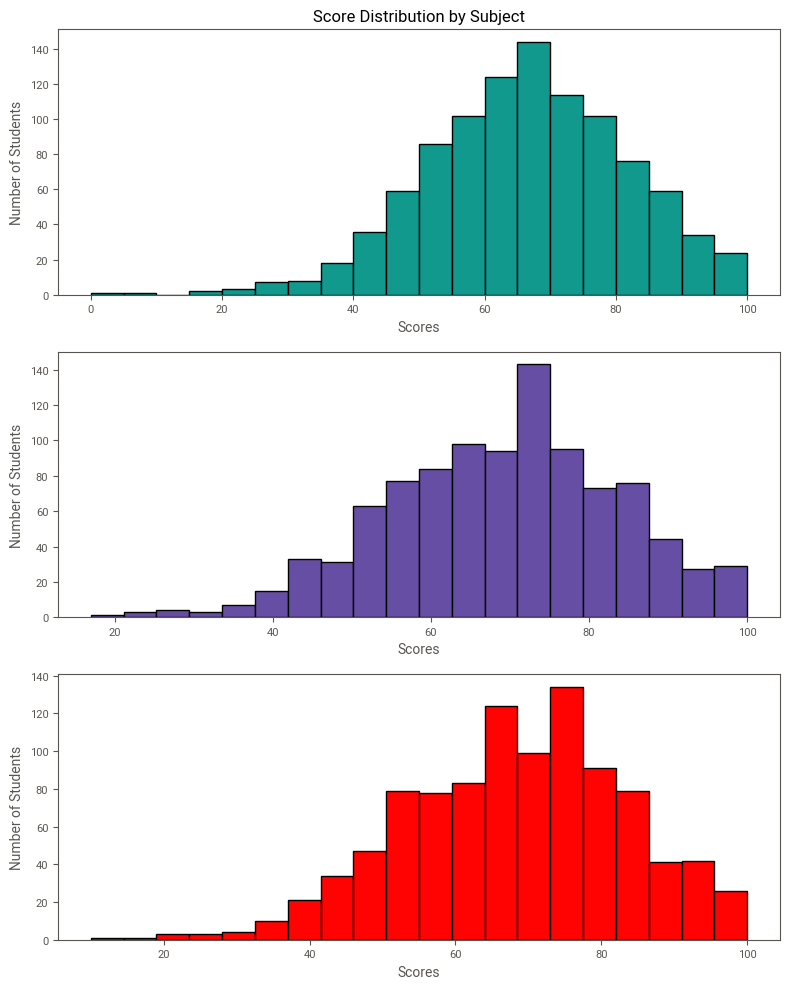

In [17]:
plt.figure(figsize=(8,10))

# 1er graphique : Math
plt.subplot(3,1,1)
plt.hist(df["math score"], bins=20, color="#11998E", edgecolor="black")
plt.title("Score Distribution by Subject")
plt.xlabel("Scores")
plt.ylabel("Number of Students")

# 2ème graphique : Reading
plt.subplot(3,1,2)
plt.hist(df["reading score"], bins=20, color="#654EA3", edgecolor="black")
plt.xlabel("Scores")
plt.ylabel("Number of Students")

# 3ème graphique : Writing
plt.subplot(3,1,3)
plt.hist(df["writing score"], bins=20, color="#FF0202", edgecolor="black")
plt.xlabel("Scores")
plt.ylabel("Number of Students")

plt.tight_layout()
plt.show()


In [18]:
# Moyenne des scores par genre
x=df.groupby("gender")[["math score","reading score","writing score"]].mean()
print(x)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


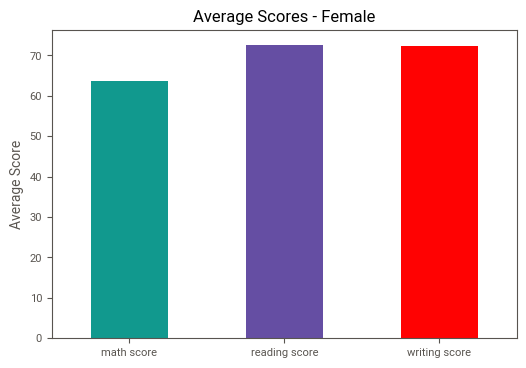

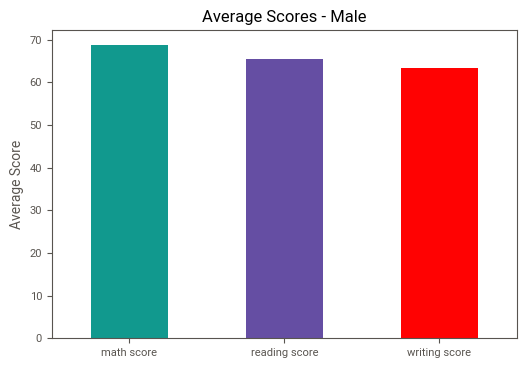

In [19]:
# Moyenne des scores par genre
subjects = ["math score", "reading score", "writing score"]

# Female
female_mean = df[df["gender"] == "female"][subjects].mean()

plt.figure(figsize=(6,4))
female_mean.plot(kind="bar", color=["#11998E","#654EA3","#FF0202"])
plt.title("Average Scores - Female")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

# Male
male_mean = df[df["gender"] == "male"][subjects].mean()

plt.figure(figsize=(6,4))
male_mean.plot(kind="bar", color=["#11998E","#654EA3","#FF0202"])
plt.title("Average Scores - Male")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()


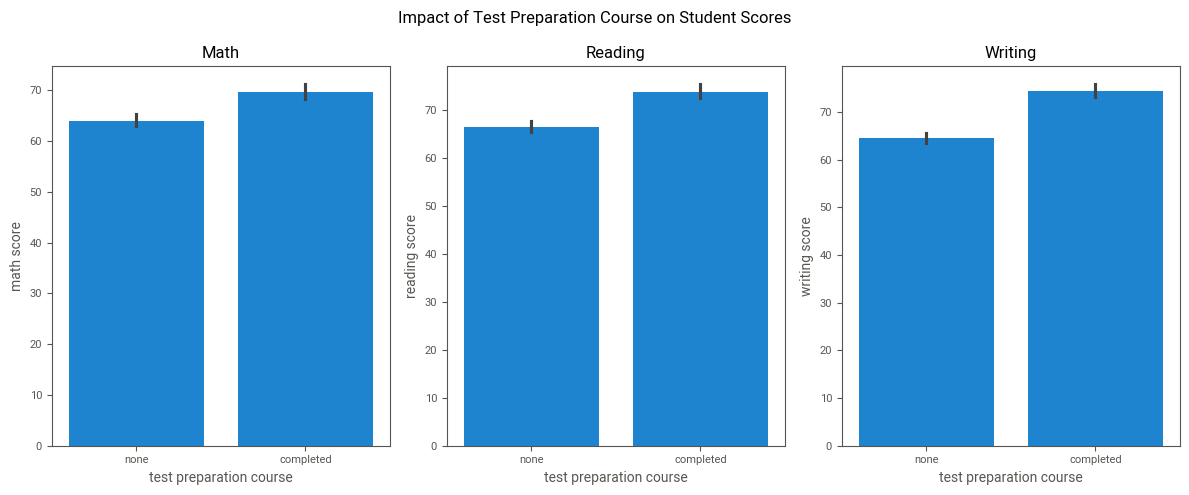

In [20]:
# Comparative Analysis of Scores by Test Preparation Course

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course', y='math score', data=df)
plt.title('Math')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course', y='reading score', data=df)
plt.title('Reading')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course', y='writing score', data=df)
plt.title('Writing')
plt.xticks(rotation=0)

plt.suptitle('Impact of Test Preparation Course on Student Scores')
plt.tight_layout()
plt.show()


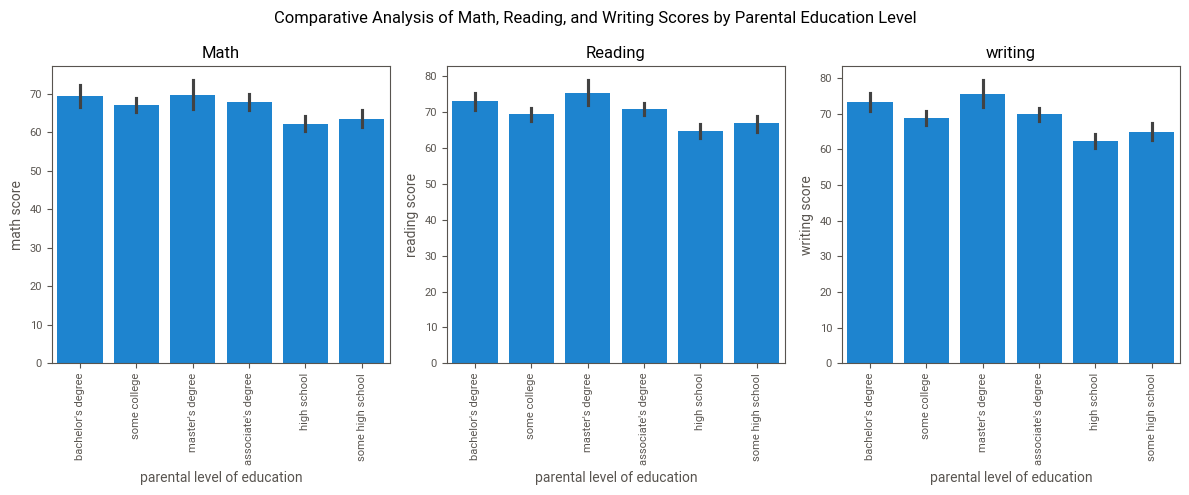

In [21]:
# Comparative Analysis of Student Scores by Parental Education Level
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=df['parental level of education'], y='math score', data=df[['math score','reading score','writing score']])
plt.title('Math')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.barplot(x='parental level of education', y='reading score', data=df)
plt.title('Reading')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.barplot(x='parental level of education', y='writing score', data=df)
plt.title('writing')
plt.xticks(rotation=90)
plt.suptitle('Comparative Analysis of Math, Reading, and Writing Scores by Parental Education Level')
plt.tight_layout()
plt.show()

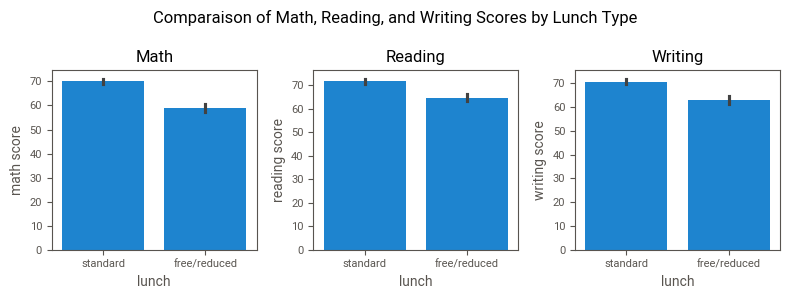

In [22]:
plt.figure(figsize=(8,3))

plt.subplot(1, 3, 1)
sns.barplot(x='lunch', y='math score', data=df)
plt.title('Math')

plt.subplot(1, 3, 2)
sns.barplot(x='lunch', y='reading score', data=df)
plt.title('Reading')

plt.subplot(1, 3, 3)
sns.barplot(x='lunch', y='writing score', data=df)
plt.title('Writing')
plt.suptitle('Comparaison of Math, Reading, and Writing Scores by Lunch Type')
plt.tight_layout()
plt.show()

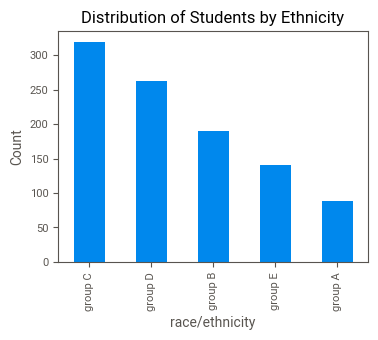

In [23]:
# Répartition des étudiants par race/ethnicity
df["race/ethnicity"].value_counts().plot(kind="bar",figsize=(4,3))
plt.title("Distribution of Students by Ethnicity")
plt.ylabel("Count")
plt.show()

#### *Matrice de Corrélation des Scores*

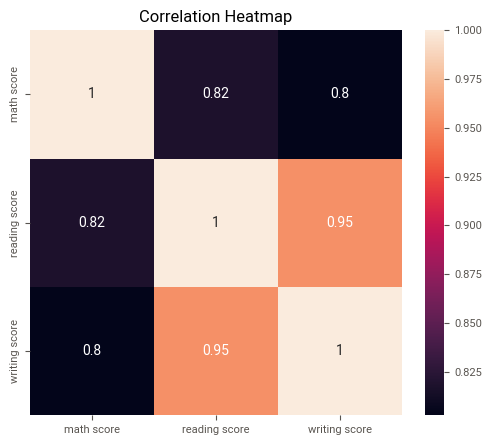

In [24]:
# Analyse de Corrélation entre les Scores en Mathématiques, Lecture et Écriture
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Feature Engineering

In [25]:
# Création de la variable avg_score (moyenne score de math, reading et writing).
df["avg_score"] = df[["math score","reading score","writing score"]].mean(axis=1)

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [27]:
# Transformation des variables
# Discrétisation des scores en catégories : (Low, Medium, High)
df["math_cat"]    = pd.cut(df["math score"],    bins=[0,50,70,100], labels=["Low","Medium","High"], include_lowest=True)
df["reading_cat"] = pd.cut(df["reading score"], bins=[0,50,70,100], labels=["Low","Medium","High"], include_lowest=True)
df["writing_cat"] = pd.cut(df["writing score"], bins=[0,50,70,100], labels=["Low","Medium","High"], include_lowest=True)
df["avg_score"] = pd.cut(df["avg_score"], bins=[0,50,70,100], labels=["Low","Medium","High"], include_lowest=True)

In [28]:
# Vérification des colonnes de df
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'avg_score', 'math_cat', 'reading_cat', 'writing_cat'],
      dtype='object')

#### Préparation des Transactions pour les Règles d’Association

In [29]:
transactions = []
for _, row in df.iterrows():
    transactions.append([
        "Gender_" + str(row["gender"]),
        "Race_" + str(row["race/ethnicity"]),
        "ParentEdu_" + str(row["parental level of education"]),
        "Lunch_" + str(row["lunch"]),
        "Prep_" + str(row["test preparation course"]),
        "Reading_" + str(row["reading_cat"]),
        "Writing_" + str(row["writing_cat"]),
        "Math_" + str(row["math_cat"])
    ])


#### Extraction des Itemsets Fréquents et Génération des Règles d’Association

In [30]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

itemsets = apriori(df_encoded, min_support=0.32, use_colnames=True)
print("******************************************************************")
print("Itemsets fréquents :")
print(itemsets)
rules = association_rules(itemsets, metric="confidence", min_threshold=0.6)

print("******************************************************************")
print("Liste des règles d'association générées :")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


******************************************************************
Itemsets fréquents :
    support                          itemsets
0     0.518                   (Gender_female)
1     0.482                     (Gender_male)
2     0.355              (Lunch_free/reduced)
3     0.645                  (Lunch_standard)
4     0.391                       (Math_High)
5     0.459                     (Math_Medium)
6     0.358                  (Prep_completed)
7     0.642                       (Prep_none)
8     0.487                    (Reading_High)
9     0.416                  (Reading_Medium)
10    0.456                    (Writing_High)
11    0.420                  (Writing_Medium)
12    0.329   (Lunch_standard, Gender_female)
13    0.334        (Prep_none, Gender_female)
14    0.418       (Prep_none, Lunch_standard)
15    0.356    (Lunch_standard, Reading_High)
16    0.340    (Lunch_standard, Writing_High)
17    0.332         (Math_High, Reading_High)
18    0.419      (Writing_High, Readin

#### Définition des Variables Explicatives et de la Variable Cible

In [31]:
# Définir la variable cible
y_col = "math_cat"
# Nettoyage robuste
y = df[y_col].astype(str).str.strip()
# Mapping avec ordre logique
mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}
y = y.map(mapping)
# Vérification
print("Valeurs uniques :", y.unique())
print("Valeurs manquantes :", y.isna().sum())

Valeurs uniques : [2 1 0]
Valeurs manquantes : 0


In [32]:
# Définir les variables explicatives
X = df.drop(columns=["avg_score","math score", "math_cat","writing_cat", "reading_cat"])

In [33]:
# Vérification des variables explicatives
X.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score'],
      dtype='object')

In [34]:
# Analyse et vérification de la variable cible
y.unique()
y.value_counts()

math_cat
1    459
2    391
0    150
Name: count, dtype: int64

#### Identification des Variables Numériques et Catégorielles

In [35]:
# Détecter colonnes numériques et catégorielles
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
# Retirer les colonnes déjà prévues pour LabelEncoding
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

#### Préparer les variables avant l'entraînement du modèle

##### **Séparation des colonnes :**
  - `num_cols` → variables numériques
  - `cat_cols` → variables catégorielles

- Transformation appliquée :
  - `StandardScaler()` → normalisation des variables numériques
  - `OneHotEncoder(handle_unknown="ignore")` → encodage des variables catégorielles

- Utilisation de `ColumnTransformer` :
  Permet d'appliquer des transformations différentes selon le type de colonnes

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# Prétraitement: scaler pour num, onehot pour cat
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

#### Modélisation et évaluation (Random Forest)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# clf = LogisticRegression(max_iter=2000, class_weight="balanced")
### Choix du modèle
rf = RandomForestClassifier(
    n_estimators=2000,
    class_weight="balanced",
    max_depth=10,
    random_state=42
)
# Split + entraînement
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Pipeline complet (encoding + scaler + modèle)
model = Pipeline(steps=[
    ("prep", preprocess),
    ("rf", rf)
])
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))

# Prédire sur un nouveau étudiant (exemple)
new_student = pd.DataFrame([{
    "gender": "male",
    "race/ethnicity": "group B",
    "parental level of education": "associate's degree",
    "lunch": "standard",
    "test preparation course": "completed",
    "reading score" : 60,
    "writing score" : 80,
}])
#  Interprétation du résultat
pred_class = model.predict(new_student)[0]
pred_proba = model.predict_proba(new_student)  # probabilités par classe
inverse_mapping = {
    0: "Low",
    1: "Medium",
    2: "High"
}

pred_label = inverse_mapping[pred_class]
pred_label = inverse_mapping[pred_class]
# Affichage final :
print("\nClasse prédite (encodée):", pred_class)
print("Classe prédite (nom):", pred_label)
print("Ordre des classes:", model.named_steps["rf"].classes_)
print("Probabilités:", pred_proba)

Confusion matrix:
 [[21  9  0]
 [ 3 80  9]
 [ 0 15 63]]

Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.77      0.87      0.82        92
           2       0.88      0.81      0.84        78

    accuracy                           0.82       200
   macro avg       0.84      0.79      0.81       200
weighted avg       0.83      0.82      0.82       200


Classe prédite (encodée): 2
Classe prédite (nom): High
Ordre des classes: [0 1 2]
Probabilités: [[0.00929988 0.43202313 0.55867699]]


#### Importance des variables (Feature Importance)

In [38]:
rf_fitted = model.named_steps["rf"]
feature_names = model.named_steps["prep"].get_feature_names_out()

# enlever num__ et cat__
clean_names = [name.split("__")[-1] for name in feature_names]

# créer dataframe temporaire
temp_df = pd.DataFrame({
    "Feature": clean_names,
    "Importance": rf_fitted.feature_importances_
})

# regrouper par variable originale (avant le _ des modalités)
temp_df["Importance of features"] = temp_df["Feature"].apply(lambda x: x.split("_")[0])

# sommer les importances des features
importance_grouped = (
    temp_df
    .groupby("Importance of features")["Importance"]
    .sum()
    .sort_values(ascending=False)
    .round(3)
)
importance_grouped

Importance of features
reading score                  0.320
writing score                  0.319
gender                         0.095
parental level of education    0.081
race/ethnicity                 0.077
lunch                          0.075
test preparation course        0.033
Name: Importance, dtype: float64